In [1]:
from src.data.datasets.nuscenes import NuScenesValidationMini, LABEL_ID2NAME
import tqdm

2024-05-01 22:50:06.413154: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-01 22:50:06.418121: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-01 22:50:06.472832: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-01 22:50:07.711320: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
nusc_base_kwargs = {
    "label_names": ['car'],
    "data_root": "data/nuscenes",
    "pipeline": [],
    "box_type_3d": "Camera",
    "load_type": 'frame_based',
    "modality": dict(use_camera=True,use_lidar=False),
    "filter_empty_gt": False,
    "test_mode": False,
    "with_velocity": False,
    "use_valid_flag": False,
}

nusc_val = NuScenesValidationMini(**nusc_base_kwargs)

05/01 22:50:13 - mmengine - INFO - ------------------------------
05/01 22:50:13 - mmengine - INFO - The length of training dataset: 486
05/01 22:50:13 - mmengine - INFO - The number of instances per category in the dataset:
+----------------------+--------+
| category             | number |
+----------------------+--------+
| car                  | 2568   |
| truck                | 124    |
| trailer              | 0      |
| bus                  | 41     |
| construction_vehicle | 0      |
| bicycle              | 52     |
| motorcycle           | 259    |
| pedestrian           | 1358   |
| traffic_cone         | 39     |
| barrier              | 0      |
+----------------------+--------+


In [3]:
nusc_val[5]

point_camera (7.228606468704736, 1.1118671019433441, 64.3309553278802)
patch_center [967.3616333007812, 491.6376953125]
patch_center_wrt_im_center (167.36163330078125, 41.6376953125)
patch_size tensor([[45., 44.]])
inside transform_points_patch_ndc
points_world:  tensor([[[ 7.2286,  1.1119, 64.3310]]])
points_ndc:  tensor([[[136.3958,  69.1946,  64.3310]]], grad_fn=<DivBackward0>)
points_patch_ndc:  tensor([[[-86.6779, -36.8505,  64.3310]]], grad_fn=<DivBackward0>)
inside transform_points_world_from_patch_ndc
points_world:  tensor([[[ 7.2286,  1.1119, 64.3310]]], grad_fn=<DivBackward0>)
recovered_points_world:  tensor([[[ 7.2286,  1.1119, 64.3310]]], grad_fn=<DivBackward0>)
point_patch_ndc tensor([[[-86.6779, -36.8505,  64.3310]]], grad_fn=<DivBackward0>) torch.Size([1, 1, 3])
inside transform_points_patch_ndc
points_world:  tensor([[ 1.0000,  0.0000,  0.0000],
        [ 0.0000, -0.2165, -0.9763],
        [ 0.0000,  0.9763, -0.2165]])
points_ndc:  tensor([[ 0.8881, -1.0888,  0.0000],
 

ValueError: A matrix has trace outside valid range [-1-eps,3+eps].

In [ ]:
# mark patch_center_2d as red on full image
# idx = 50
import matplotlib.pyplot as plt

for idx in tqdm.tqdm(range(len(nusc_val))):
    full_img = nusc_val[idx].full_img.permute(1,2,0)

    # mark patch_center_2d as red on full image 
    patch_center_2d = nusc_val[idx].patch_center_2d # torch.Size([2])

100%|██████████| 486/486 [01:32<00:00,  5.28it/s]


center2d [1589.0234375, 510.1682434082031]
point_camera tensor([17.6652,  1.3740, 29.1690]) torch.Size([3])
z_camera tensor([[29.1690]], grad_fn=<SelectBackward0>) torch.Size([1, 1])
z_ndc tensor([[-0.2709]], grad_fn=<SubBackward0>) torch.Size([1, 1])
z_patch tensor([[-0.0379]], grad_fn=<MulBackward0>) torch.Size([1, 1])
point_patch_ndc[..., 2] tensor([[29.1690]], grad_fn=<SelectBackward0>) torch.Size([1, 1])
x_patch, y_patch, z_patch tensor(-1.1181, grad_fn=<UnbindBackward0>) tensor(-0.2643, grad_fn=<UnbindBackward0>) tensor(-0.0379, grad_fn=<UnbindBackward0>)
R_patch tensor([[-1.1357, -0.2746,  0.0000],
        [-1.1364, -0.2742, -0.7184],
        [-1.1359, -0.2737,  0.6956]], grad_fn=<ReshapeAliasBackward0>) torch.Size([3, 3])
translation tensor([-1.1181, -0.2643, -0.0379]) torch.Size([3])
se3_exp_map_matrix tensor([[-1.1357, -1.1364, -1.1359,  0.0000],
        [-0.2746, -0.2742, -0.2737,  0.0000],
        [ 0.0000, -0.7184,  0.6956,  0.0000],
        [-1.1181, -0.2643, -0.0379,  1.

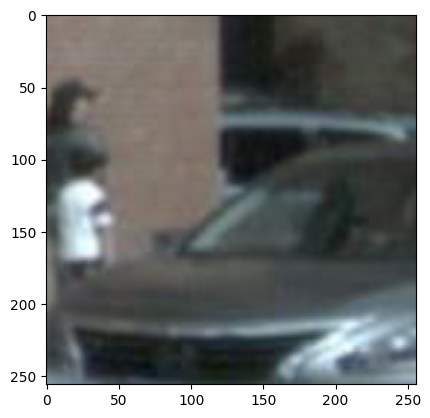

(None, 50)

In [ ]:
patch = nusc_val[idx].patch.permute(1,2,0).numpy()
plt.imshow(patch)
plt.show(), idx

center2d [931.0510864257812, 496.1482238769531]
point_camera tensor([ 4.6917,  1.1751, 56.2671]) torch.Size([3])
z_camera tensor([[56.2671]], grad_fn=<SelectBackward0>) torch.Size([1, 1])
z_ndc tensor([[0.4066]], grad_fn=<SubBackward0>) torch.Size([1, 1])
z_patch tensor([[0.0235]], grad_fn=<MulBackward0>) torch.Size([1, 1])
point_patch_ndc[..., 2] tensor([[56.2671]], grad_fn=<SelectBackward0>) torch.Size([1, 1])
x_patch, y_patch, z_patch tensor(-0.2172, grad_fn=<UnbindBackward0>) tensor(-0.1587, grad_fn=<UnbindBackward0>) tensor(0.0235, grad_fn=<UnbindBackward0>)
R_patch tensor([[-0.2254, -0.1668,  0.0000],
        [-0.2257, -0.1670, -0.9807],
        [-0.2256, -0.1665, -0.1956]], grad_fn=<ReshapeAliasBackward0>) torch.Size([3, 3])
translation tensor([-0.2172, -0.1587,  0.0235]) torch.Size([3])
se3_exp_map_matrix tensor([[-0.2254, -0.2257, -0.2256,  0.0000],
        [-0.1668, -0.1670, -0.1665,  0.0000],
        [ 0.0000, -0.9807, -0.1956,  0.0000],
        [-0.2172, -0.1587,  0.0235,  

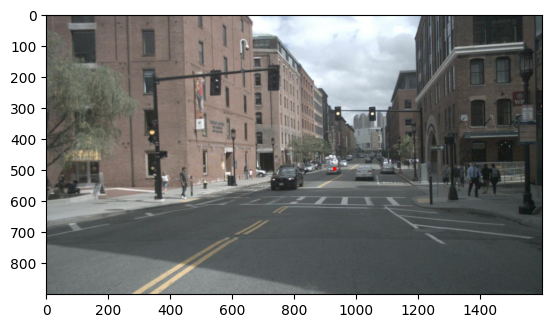

center2d [1028.0096435546875, 510.0111999511719]
point_camera tensor([ 6.4561,  1.2829, 40.1558]) torch.Size([3])
z_camera tensor([[40.1558]], grad_fn=<SelectBackward0>) torch.Size([1, 1])
z_ndc tensor([[0.0038]], grad_fn=<SubBackward0>) torch.Size([1, 1])
z_patch tensor([[0.0003]], grad_fn=<MulBackward0>) torch.Size([1, 1])
point_patch_ndc[..., 2] tensor([[40.1558]], grad_fn=<SelectBackward0>) torch.Size([1, 1])
x_patch, y_patch, z_patch tensor(-0.3571, grad_fn=<UnbindBackward0>) tensor(-0.2093, grad_fn=<UnbindBackward0>) tensor(0.0003, grad_fn=<UnbindBackward0>)
R_patch tensor([[-0.3655, -0.2170,  0.0000],
        [-0.3656, -0.2168,  0.9871],
        [-0.3657, -0.2175,  0.1603]], grad_fn=<ReshapeAliasBackward0>) torch.Size([3, 3])
translation tensor([-3.5711e-01, -2.0927e-01,  2.8482e-04]) torch.Size([3])
se3_exp_map_matrix tensor([[-3.6551e-01, -3.6560e-01, -3.6574e-01,  0.0000e+00],
        [-2.1702e-01, -2.1677e-01, -2.1746e-01,  0.0000e+00],
        [ 0.0000e+00,  9.8706e-01,  1.

(None, tensor([[-0.2934, -0.1354, -0.3345, -2.0226,  0.6141, -0.2495]]))

In [ ]:
# mark patch_center_2d as red on full image
idx = 11
import matplotlib.pyplot as plt

full_img = nusc_val[idx].full_img.permute(1,2,0)

# mark patch_center_2d as red on full image 
patch_center_2d = nusc_val[idx].patch_center_2d # torch.Size([2])

full_img = full_img.numpy()
full_img = full_img.copy() # (900, 1600, 3)

# make patch_center_2d as red with surrounding pixels red

patch_center_2d = patch_center_2d.numpy()
patch_center_2d = patch_center_2d.astype(int)
patch_center_2d = patch_center_2d.tolist()

for i in range(-5, 6):
    for j in range(-5, 6):
        full_img[patch_center_2d[1]+i, patch_center_2d[0]+j, :] = [1,0,0]
        
plt.imshow(full_img)
plt.show(), nusc_val[idx].pose_6d

In [ ]:
# visualize 

center2d [969.6643676757812, 504.52740478515625]
point_camera tensor([ 3.0981,  0.7654, 22.0657]) torch.Size([3])
z_camera tensor([[22.0657]], grad_fn=<SelectBackward0>) torch.Size([1, 1])
z_ndc tensor([[-0.4485]], grad_fn=<SubBackward0>) torch.Size([1, 1])
z_patch tensor([[-0.0498]], grad_fn=<MulBackward0>) torch.Size([1, 1])
point_patch_ndc[..., 2] tensor([[22.0657]], grad_fn=<SelectBackward0>) torch.Size([1, 1])
x_patch, y_patch, z_patch tensor(-0.3329, grad_fn=<UnbindBackward0>) tensor(-0.2397, grad_fn=<UnbindBackward0>) tensor(-0.0498, grad_fn=<UnbindBackward0>)
R_patch tensor([[-0.3393, -0.2458,  0.0000],
        [-0.3393, -0.2456,  1.0000],
        [-0.3395, -0.2463,  0.0044]], grad_fn=<ReshapeAliasBackward0>) torch.Size([3, 3])
translation tensor([-0.3329, -0.2397, -0.0498]) torch.Size([3])
se3_exp_map_matrix tensor([[-0.3393, -0.3393, -0.3395,  0.0000],
        [-0.2458, -0.2456, -0.2463,  0.0000],
        [ 0.0000,  1.0000,  0.0044,  0.0000],
        [-0.3329, -0.2397, -0.049

tensor([[-0.2399, -0.0074, -0.4466, -2.5238,  0.6876, -0.1892]])

In [ ]:
nusc_val[0].full_img.shape, nusc_val[0].patch.shape

center2d [1037.2235107421875, 507.98443603515625]
point_camera tensor([ 7.1338,  1.2870, 42.4305]) torch.Size([3])
z_camera tensor([[42.4305]], grad_fn=<SelectBackward0>) torch.Size([1, 1])
z_ndc tensor([[0.0606]], grad_fn=<SubBackward0>) torch.Size([1, 1])
z_patch tensor([[0.0062]], grad_fn=<MulBackward0>) torch.Size([1, 1])
point_patch_ndc[..., 2] tensor([[42.4305]], grad_fn=<SelectBackward0>) torch.Size([1, 1])
x_patch, y_patch, z_patch tensor(-0.3933, grad_fn=<UnbindBackward0>) tensor(-0.2295, grad_fn=<UnbindBackward0>) tensor(0.0062, grad_fn=<UnbindBackward0>)
R_patch tensor([[-0.4054, -0.2404,  0.0000],
        [-0.4056, -0.2399,  0.9219],
        [-0.4057, -0.2409,  0.3874]], grad_fn=<ReshapeAliasBackward0>) torch.Size([3, 3])
translation tensor([-0.3933, -0.2295,  0.0062]) torch.Size([3])
se3_exp_map_matrix tensor([[-0.4054, -0.4056, -0.4057,  0.0000],
        [-0.2404, -0.2399, -0.2409,  0.0000],
        [ 0.0000,  0.9219,  0.3874,  0.0000],
        [-0.3933, -0.2295,  0.0062,

(torch.Size([3, 900, 1600]), torch.Size([3, 256, 256]))

In [ ]:
nusc_val[0].full_img.min(), nusc_val[0].full_img.max()

center2d [989.17724609375, 488.5842590332031]
point_camera tensor([ 9.4016,  1.0755, 72.4430]) torch.Size([3])
z_camera tensor([[72.4430]], grad_fn=<SelectBackward0>) torch.Size([1, 1])
z_ndc tensor([[0.8111]], grad_fn=<SubBackward0>) torch.Size([1, 1])
z_patch tensor([[0.0360]], grad_fn=<MulBackward0>) torch.Size([1, 1])
point_patch_ndc[..., 2] tensor([[72.4430]], grad_fn=<SelectBackward0>) torch.Size([1, 1])
x_patch, y_patch, z_patch tensor(-0.2751, grad_fn=<UnbindBackward0>) tensor(-0.1265, grad_fn=<UnbindBackward0>) tensor(0.0360, grad_fn=<UnbindBackward0>)
R_patch tensor([[-0.2838, -0.1342,  0.0000],
        [-0.2841, -0.1344, -0.9737],
        [-0.2840, -0.1340, -0.2279]], grad_fn=<ReshapeAliasBackward0>) torch.Size([3, 3])
translation tensor([-0.2751, -0.1265,  0.0360]) torch.Size([3])
se3_exp_map_matrix tensor([[-0.2838, -0.2841, -0.2840,  0.0000],
        [-0.1342, -0.1344, -0.1340,  0.0000],
        [ 0.0000, -0.9737, -0.2279,  0.0000],
        [-0.2751, -0.1265,  0.0360,  1.

(tensor(0.), tensor(1.))

center2d [989.17724609375, 488.5842590332031]
point_camera tensor([ 9.4016,  1.0755, 72.4430]) torch.Size([3])
z_camera tensor([[72.4430]], grad_fn=<SelectBackward0>) torch.Size([1, 1])
z_ndc tensor([[0.8111]], grad_fn=<SubBackward0>) torch.Size([1, 1])
z_patch tensor([[0.0360]], grad_fn=<MulBackward0>) torch.Size([1, 1])
point_patch_ndc[..., 2] tensor([[72.4430]], grad_fn=<SelectBackward0>) torch.Size([1, 1])
x_patch, y_patch, z_patch tensor(-0.2751, grad_fn=<UnbindBackward0>) tensor(-0.1265, grad_fn=<UnbindBackward0>) tensor(0.0360, grad_fn=<UnbindBackward0>)
R_patch tensor([[-0.2838, -0.1342,  0.0000],
        [-0.2841, -0.1344, -0.9737],
        [-0.2840, -0.1340, -0.2279]], grad_fn=<ReshapeAliasBackward0>) torch.Size([3, 3])
translation tensor([-0.2751, -0.1265,  0.0360]) torch.Size([3])
se3_exp_map_matrix tensor([[-0.2838, -0.2841, -0.2840,  0.0000],
        [-0.1342, -0.1344, -0.1340,  0.0000],
        [ 0.0000, -0.9737, -0.2279,  0.0000],
        [-0.2751, -0.1265,  0.0360,  1.

center2d [1037.2235107421875, 507.98443603515625]
point_camera tensor([ 7.1338,  1.2870, 42.4305]) torch.Size([3])
z_camera tensor([[42.4305]], grad_fn=<SelectBackward0>) torch.Size([1, 1])
z_ndc tensor([[0.0606]], grad_fn=<SubBackward0>) torch.Size([1, 1])
z_patch tensor([[0.0062]], grad_fn=<MulBackward0>) torch.Size([1, 1])
point_patch_ndc[..., 2] tensor([[42.4305]], grad_fn=<SelectBackward0>) torch.Size([1, 1])
x_patch, y_patch, z_patch tensor(-0.3933, grad_fn=<UnbindBackward0>) tensor(-0.2295, grad_fn=<UnbindBackward0>) tensor(0.0062, grad_fn=<UnbindBackward0>)
R_patch tensor([[-0.4054, -0.2404,  0.0000],
        [-0.4056, -0.2399,  0.9219],
        [-0.4057, -0.2409,  0.3874]], grad_fn=<ReshapeAliasBackward0>) torch.Size([3, 3])
translation tensor([-0.3933, -0.2295,  0.0062]) torch.Size([3])
se3_exp_map_matrix tensor([[-0.4054, -0.4056, -0.4057,  0.0000],
        [-0.2404, -0.2399, -0.2409,  0.0000],
        [ 0.0000,  0.9219,  0.3874,  0.0000],
        [-0.3933, -0.2295,  0.0062,

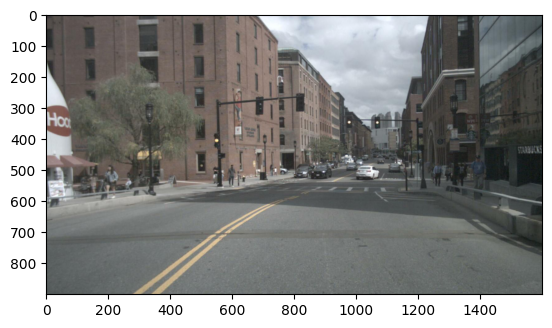

In [ ]:
import matplotlib.pyplot as plt
nusc_val[0].full_img.shape # torch.Size([3, 900, 1600])
plt.imshow(nusc_val[0].full_img.permute(1,2,0))


In [ ]:
nusc_val[0].patch.min(), nusc_val[0].patch.max()

center2d [1037.2235107421875, 507.98443603515625]
point_camera tensor([ 7.1338,  1.2870, 42.4305]) torch.Size([3])
z_camera tensor([[42.4305]], grad_fn=<SelectBackward0>) torch.Size([1, 1])
z_ndc tensor([[0.0606]], grad_fn=<SubBackward0>) torch.Size([1, 1])
z_patch tensor([[0.0062]], grad_fn=<MulBackward0>) torch.Size([1, 1])
point_patch_ndc[..., 2] tensor([[42.4305]], grad_fn=<SelectBackward0>) torch.Size([1, 1])
x_patch, y_patch, z_patch tensor(-0.3933, grad_fn=<UnbindBackward0>) tensor(-0.2295, grad_fn=<UnbindBackward0>) tensor(0.0062, grad_fn=<UnbindBackward0>)
R_patch tensor([[-0.4054, -0.2404,  0.0000],
        [-0.4056, -0.2399,  0.9219],
        [-0.4057, -0.2409,  0.3874]], grad_fn=<ReshapeAliasBackward0>) torch.Size([3, 3])
translation tensor([-0.3933, -0.2295,  0.0062]) torch.Size([3])
se3_exp_map_matrix tensor([[-0.4054, -0.4056, -0.4057,  0.0000],
        [-0.2404, -0.2399, -0.2409,  0.0000],
        [ 0.0000,  0.9219,  0.3874,  0.0000],
        [-0.3933, -0.2295,  0.0062,

(tensor(0.1020), tensor(1.))

center2d [969.6643676757812, 504.52740478515625]
point_camera tensor([ 3.0981,  0.7654, 22.0657]) torch.Size([3])
z_camera tensor([[22.0657]], grad_fn=<SelectBackward0>) torch.Size([1, 1])
z_ndc tensor([[-0.4485]], grad_fn=<SubBackward0>) torch.Size([1, 1])
z_patch tensor([[-0.0498]], grad_fn=<MulBackward0>) torch.Size([1, 1])
point_patch_ndc[..., 2] tensor([[22.0657]], grad_fn=<SelectBackward0>) torch.Size([1, 1])
x_patch, y_patch, z_patch tensor(-0.3329, grad_fn=<UnbindBackward0>) tensor(-0.2397, grad_fn=<UnbindBackward0>) tensor(-0.0498, grad_fn=<UnbindBackward0>)
R_patch tensor([[-0.3393, -0.2458,  0.0000],
        [-0.3393, -0.2456,  1.0000],
        [-0.3395, -0.2463,  0.0044]], grad_fn=<ReshapeAliasBackward0>) torch.Size([3, 3])
translation tensor([-0.3329, -0.2397, -0.0498]) torch.Size([3])
se3_exp_map_matrix tensor([[-0.3393, -0.3393, -0.3395,  0.0000],
        [-0.2458, -0.2456, -0.2463,  0.0000],
        [ 0.0000,  1.0000,  0.0044,  0.0000],
        [-0.3329, -0.2397, -0.049

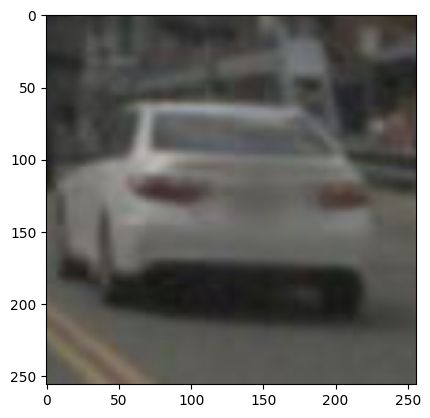

In [ ]:
plt.imshow(nusc_val[1].patch.permute(1,2,0))

center2d [989.17724609375, 488.5842590332031]
point_camera tensor([ 9.4016,  1.0755, 72.4430]) torch.Size([3])
z_camera tensor([[72.4430]], grad_fn=<SelectBackward0>) torch.Size([1, 1])
z_ndc tensor([[0.8111]], grad_fn=<SubBackward0>) torch.Size([1, 1])
z_patch tensor([[0.0360]], grad_fn=<MulBackward0>) torch.Size([1, 1])
point_patch_ndc[..., 2] tensor([[72.4430]], grad_fn=<SelectBackward0>) torch.Size([1, 1])
x_patch, y_patch, z_patch tensor(-0.2751, grad_fn=<UnbindBackward0>) tensor(-0.1265, grad_fn=<UnbindBackward0>) tensor(0.0360, grad_fn=<UnbindBackward0>)
R_patch tensor([[-0.2838, -0.1342,  0.0000],
        [-0.2841, -0.1344, -0.9737],
        [-0.2840, -0.1340, -0.2279]], grad_fn=<ReshapeAliasBackward0>) torch.Size([3, 3])
translation tensor([-0.2751, -0.1265,  0.0360]) torch.Size([3])
se3_exp_map_matrix tensor([[-0.2838, -0.2841, -0.2840,  0.0000],
        [-0.1342, -0.1344, -0.1340,  0.0000],
        [ 0.0000, -0.9737, -0.2279,  0.0000],
        [-0.2751, -0.1265,  0.0360,  1.

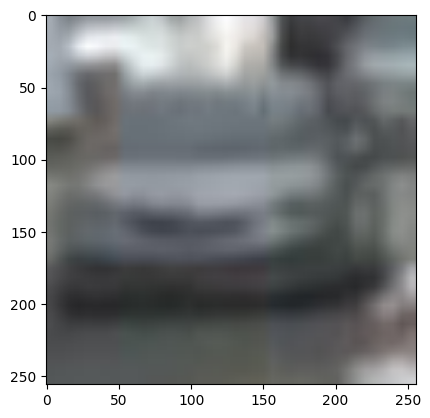

In [ ]:
plt.imshow(nusc_val[0].patch.permute(1,2,0))

In [ ]:
nusc_val[1].patch.min(), nusc_val[1].patch.max()

center2d [843.0703735351562, 508.55377197265625]
point_camera tensor([-0.3467,  0.7467, 18.7883]) torch.Size([3])
z_camera tensor([[18.7883]], grad_fn=<SelectBackward0>) torch.Size([1, 1])
z_ndc tensor([[-0.5305]], grad_fn=<SubBackward0>) torch.Size([1, 1])
z_patch tensor([[-0.0530]], grad_fn=<MulBackward0>) torch.Size([1, 1])
point_patch_ndc[..., 2] tensor([[18.7883]], grad_fn=<SelectBackward0>) torch.Size([1, 1])
x_patch, y_patch, z_patch tensor(-0.1641, grad_fn=<UnbindBackward0>) tensor(-0.2388, grad_fn=<UnbindBackward0>) tensor(-0.0530, grad_fn=<UnbindBackward0>)
R_patch tensor([[-0.1683, -0.2436,  0.0000],
        [-0.1688, -0.2438, -0.9996],
        [-0.1685, -0.2432,  0.0269]], grad_fn=<ReshapeAliasBackward0>) torch.Size([3, 3])
translation tensor([-0.1641, -0.2388, -0.0530]) torch.Size([3])
se3_exp_map_matrix tensor([[-0.1683, -0.1688, -0.1685,  0.0000],
        [-0.2436, -0.2438, -0.2432,  0.0000],
        [ 0.0000, -0.9996,  0.0269,  0.0000],
        [-0.1641, -0.2388, -0.053

(tensor(0.0588), tensor(0.7451))

In [ ]:
nusc_val[1].patch.max(), nusc_val[1].patch.min()

center2d [843.0703735351562, 508.55377197265625]
point_camera tensor([-0.3467,  0.7467, 18.7883]) torch.Size([3])
z_camera tensor([[18.7883]], grad_fn=<SelectBackward0>) torch.Size([1, 1])
z_ndc tensor([[-0.5305]], grad_fn=<SubBackward0>) torch.Size([1, 1])
z_patch tensor([[-0.0530]], grad_fn=<MulBackward0>) torch.Size([1, 1])
point_patch_ndc[..., 2] tensor([[18.7883]], grad_fn=<SelectBackward0>) torch.Size([1, 1])
x_patch, y_patch, z_patch tensor(-0.1641, grad_fn=<UnbindBackward0>) tensor(-0.2388, grad_fn=<UnbindBackward0>) tensor(-0.0530, grad_fn=<UnbindBackward0>)
R_patch tensor([[-0.1683, -0.2436,  0.0000],
        [-0.1688, -0.2438, -0.9996],
        [-0.1685, -0.2432,  0.0269]], grad_fn=<ReshapeAliasBackward0>) torch.Size([3, 3])
translation tensor([-0.1641, -0.2388, -0.0530]) torch.Size([3])
se3_exp_map_matrix tensor([[-0.1683, -0.1688, -0.1685,  0.0000],
        [-0.2436, -0.2438, -0.2432,  0.0000],
        [ 0.0000, -0.9996,  0.0269,  0.0000],
        [-0.1641, -0.2388, -0.053

(tensor(1.), tensor(0.0588))